# Ford GoBike System Data
## by Araldo Rodrigues

## Introduction

The dataset used in this project contains information about rides that were made in a bike-sharing system, that covers the great San Francisco. Initially, it has 16 variables, which will be further explored to extract insights. 
Before any analysis, the dataset will be stored and loaded in the notebook, the data will be cleaned, and them assessed, to get these insights through visualization

## Preliminary Wrangling

The necessary libraries needed for the project are imported below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We can see the first five rows of the dataset:

In [2]:
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


Before any further coding, we will make a copy of the dataset:

In [3]:
bike = bike_df.copy()

Now, for the Data Wrangling process, we will make some changes in the columns

Remove any row with missing value:

In [4]:
bike.dropna(inplace=True)
bike.isnull().sum().any() # confirm the dataframe has no missing values

False

Remove any duplicated rows if exists:

In [5]:
bike.drop_duplicates(inplace=True)
bike.reset_index(inplace=True) # reset the index of the dataframe
bike.drop(['index'], axis=1, inplace=True)

Change member_birth_year to int:

In [6]:
bike['member_birth_year'] = bike['member_birth_year'].astype('int')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  int32  
 14  memb

Change the bike_id, start_station_id and end_station_id to object dataype:

In [7]:
bike['bike_id'] = bike['bike_id'].astype(str)

bike['start_station_id'] = bike['start_station_id'].astype(str)
bike['start_station_id'] = bike['start_station_id'].str.split('.').str[0] # eliminate the decimal value

bike['end_station_id'] = bike['end_station_id'].astype(str)
bike['end_station_id'] = bike['end_station_id'].str.split('.').str[0] # eliminate the decimal value

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  object 
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  object 
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  object 
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  int32  
 14  memb

Separate the year and time in start_time and end_time, creating new columns to store each information individually:

In [8]:
bike['start_date'] = bike['start_time'].str.split(' ').str[0]
bike['start_time'] = bike['start_time'].str.split(' ').str[1]
bike['end_date'] = bike['end_time'].str.split(' ').str[0]
bike['end_time'] = bike['end_time'].str.split(' ').str[1]

bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date
0,52185,17:32:10.1450,08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2019-02-28,2019-03-01
1,61854,12:13:13.2180,05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2019-02-28,2019-03-01
2,36490,17:54:26.0100,04:02:36.8420,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2019-02-28,2019-03-01
3,1585,23:54:18.5490,00:20:44.0740,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019-02-28,2019-03-01
4,1793,23:49:58.6320,00:19:51.7600,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2019-02-28,2019-03-01


Create a column with the age of the customer when he rented a bike:

In [9]:
bike['member_age'] = bike['start_date'].str.split('-').str[0].astype(int)
bike['member_age'] = bike['member_age'] - bike['member_birth_year']
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,member_age
0,52185,17:32:10.1450,08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2019-02-28,2019-03-01,35
1,61854,12:13:13.2180,05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2019-02-28,2019-03-01,47
2,36490,17:54:26.0100,04:02:36.8420,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2019-02-28,2019-03-01,30
3,1585,23:54:18.5490,00:20:44.0740,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019-02-28,2019-03-01,45
4,1793,23:49:58.6320,00:19:51.7600,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2019-02-28,2019-03-01,60


Convert the start_year and end_year columns to datetime format:

In [10]:
bike['start_date'] = pd.to_datetime(bike['start_date'])
bike['end_date'] = pd.to_datetime(bike['end_date'])

bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,member_age
0,52185,17:32:10.1450,08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2019-02-28,2019-03-01,35
1,61854,12:13:13.2180,05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2019-02-28,2019-03-01,47
2,36490,17:54:26.0100,04:02:36.8420,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2019-02-28,2019-03-01,30
3,1585,23:54:18.5490,00:20:44.0740,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019-02-28,2019-03-01,45
4,1793,23:49:58.6320,00:19:51.7600,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2019-02-28,2019-03-01,60


In [11]:
bike['start_time'] = bike['start_time'].str.split('.').str[0] # eliminate the decimal value of the seconds
bike['start_time'] = pd.to_datetime(bike['start_time'],format= '%H:%M:%S' ).dt.time

bike['end_time'] = bike['end_time'].str.split('.').str[0] # eliminate the decimal value of the seconds
bike['end_time'] = pd.to_datetime(bike['end_time'],format= '%H:%M:%S' ).dt.time

bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,member_age
0,52185,17:32:10,08:01:55,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2019-02-28,2019-03-01,35
1,61854,12:13:13,05:24:08,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2019-02-28,2019-03-01,47
2,36490,17:54:26,04:02:36,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2019-02-28,2019-03-01,30
3,1585,23:54:18,00:20:44,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019-02-28,2019-03-01,45
4,1793,23:49:58,00:19:51,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2019-02-28,2019-03-01,60


After these changes, the dataset is in a better format for our analysis. First, we will see the structure of our dataframe:

In [12]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,member_age
0,52185,17:32:10,08:01:55,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2019-02-28,2019-03-01,35
1,61854,12:13:13,05:24:08,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2019-02-28,2019-03-01,47
2,36490,17:54:26,04:02:36,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2019-02-28,2019-03-01,30
3,1585,23:54:18,00:20:44,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019-02-28,2019-03-01,45
4,1793,23:49:58,00:19:51,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2019-02-28,2019-03-01,60


In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  object        
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [14]:
bike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,34.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,18.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,27.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,32.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,39.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,141.000000


For the exploration part, the main features of interest in the dataset are:

* duration of trip
* information about the users (gender, age, type)
* location of the station

Throughout the analysis, we will see how these features interact with each other, if there are any insteresting relations between them and if other features also are related to them.

The function below will be used to reduce excessive coding:

In [169]:
def boxplot(x, y):
    sns.boxplot(data = bike, x = x, y = y, color=base_color)

## Univariate Exploration

First, we will explore the distribution of our interest variables individually:

#### What is the distribution of duration of trip?

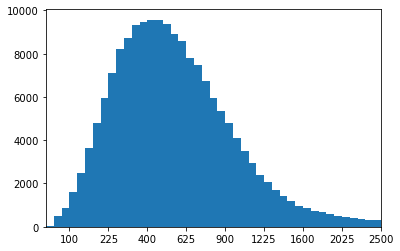

In [70]:
def sqrt_trans(x, inverse = False): # get the square root of each value
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, 50+1, 1)    
    
plt.hist(bike['duration_sec'].apply(sqrt_trans),bins=bin_edges)

tick_locs = np.arange(0, 50+5, 5)

plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))
plt.xlim(7,50);

The duration of the ride were more commom between 200 and 900. As the duaration time had very high values, the datas ploted are equal to the square root of them originally, but the x-scale represented the original values. With that said, we can see that the majority of trips were between 200 and 900 seconds, with the peak between 400 and 600 seconds. So, the conclusion we get is the most commom trips are low in time. 

#### What is the distribution of user gender?

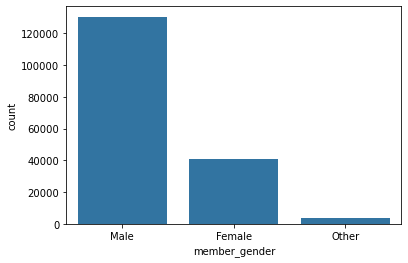

In [16]:
base_color = sns.color_palette()[0] 

gender_freq = bike['member_gender'].value_counts().index

sns.countplot(data=bike, x='member_gender', color=base_color, order=gender_freq);

The users are predominantly man.

#### What is the distribution of user age?

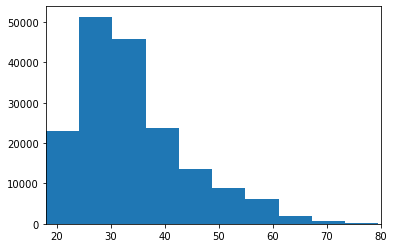

In [17]:
plt.hist(data=bike, x='member_age', bins=20)
plt.xlim((18, 80));

The users are mostly between 25 and 35 years old.

#### What is the distribution of user type?

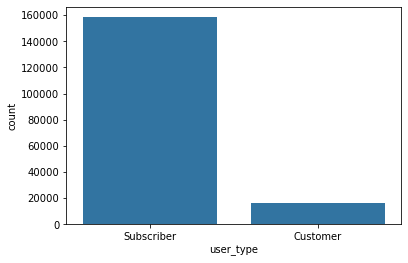

In [18]:
type_freq = bike['user_type'].value_counts().index

sns.countplot(data=bike, x='user_type', color=base_color, order=type_freq);

The users are predominantly subscribers.

#### What is the distribution of station location?

For start station:

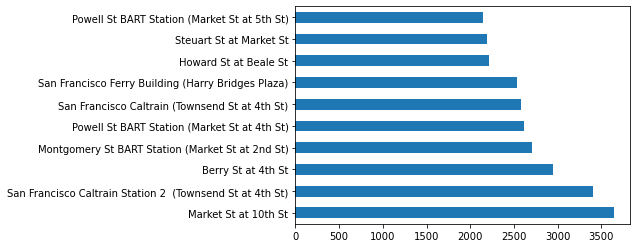

In [20]:
bike_10_start_station = bike.query('start_station_name in ("Market St at 10th St", "San Francisco Caltrain Station 2  (Townsend St at 4th St)", "Berry St at 4th St", "Montgomery St BART Station (Market St at 2nd St)", "Powell St BART Station (Market St at 4th St)", "San Francisco Caltrain (Townsend St at 4th St)", "San Francisco Ferry Building (Harry Bridges Plaza)", "Howard St at Beale St", "Steuart St at Market St", "Powell St BART Station (Market St at 5th St)")')
bike_10_start_station['start_station_name'].value_counts().plot(kind='barh');

For end location:

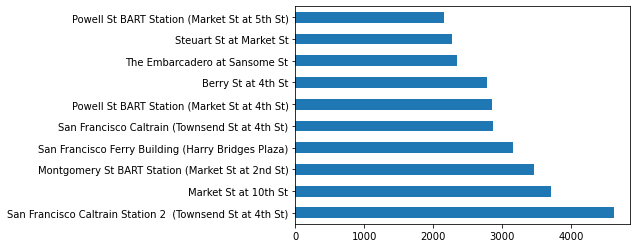

In [36]:
bike_10_end_station = bike.query('end_station_name in ("Market St at 10th St", "San Francisco Caltrain Station 2  (Townsend St at 4th St)", "Berry St at 4th St", "Montgomery St BART Station (Market St at 2nd St)", "Powell St BART Station (Market St at 4th St)", "San Francisco Caltrain (Townsend St at 4th St)", "San Francisco Ferry Building (Harry Bridges Plaza)", "The Embarcadero at Sansome St", "Steuart St at Market St", "Powell St BART Station (Market St at 5th St)")')
bike_10_end_station['end_station_name'].value_counts().plot(kind='barh');

The start and end stations more used are practically the same (not meaning the start is equal to the end for the user). The top 2 are Steuart St at Market St and Powell St BART Station (Market St at 5th St).  

## Bivariate Exploration

In this part, we will explore the relationship between our interest variables

#### What is the relation between duration of trip and user age?

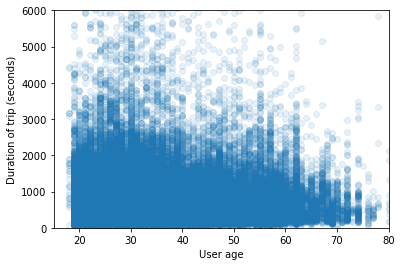

In [142]:
plt.scatter(data=bike, x='member_age', y='duration_sec', alpha=1/10)

plt.xlim(15,80)
plt.ylim(0,6000)
plt.xlabel('User age')
plt.ylabel('Duration of trip (seconds)');

For duration of trip, up to about 2500 seconds, we can see that the younger the person, the longer the duration tends to be, as well for customers, which tends to be longer than subscribers.

#### What is the relation between duration of trip and user type?

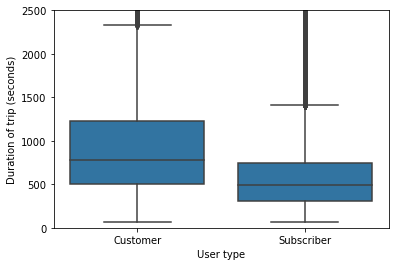

In [171]:
boxplot('user_type', 'duration_sec')

plt.ylim(0,2500)
plt.xlabel('User type')
plt.ylabel('Duration of trip (seconds)');

Subscribers and customers have the same time duration.

#### What is the relation between duration of trip and user gender?

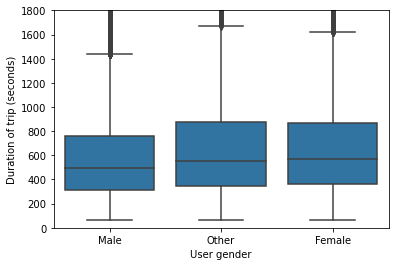

In [170]:
boxplot('member_gender', 'duration_sec')

plt.ylim(0,1800)
plt.xlabel('User gender')
plt.ylabel('Duration of trip (seconds)');

Men tend to have a bit less duration, compared to the other genders.

#### What is the relation between gender and age of user?

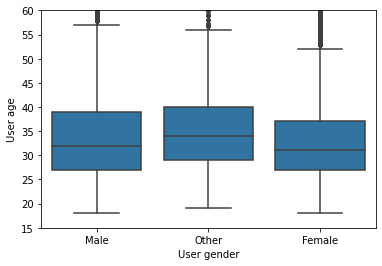

In [173]:
boxplot('member_gender', 'member_age')

plt.ylim(15,60)
plt.xlabel('User gender')
plt.ylabel('User age');

 About the users, for the genders, they have the same age group.

#### What is the relation between gender and type of user?

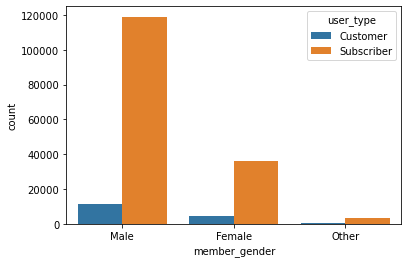

In [24]:
gender_freq = bike['member_gender'].value_counts().index

sns.countplot(data=bike, x='member_gender', hue = 'user_type', order=gender_freq);

The proportion of subscribers are much higher than customers for all genders.

#### What is the relation between age and type of user?

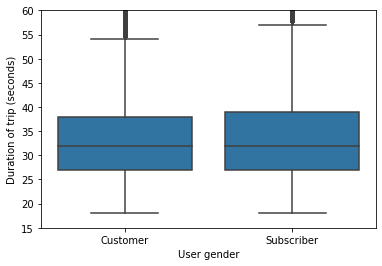

In [174]:
boxplot('user_type', y = 'member_age')

plt.ylim(15,60)
plt.xlabel('User gender')
plt.ylabel('Duration of trip (seconds)');

The age group is the same for the user types, mostly between 25 and 40 years old for both types.

#### What is the relation between station location and user gender?

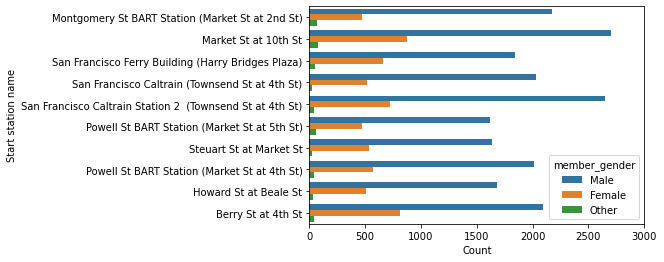

In [30]:
sns.countplot(data=bike_10_start_station, y = 'start_station_name', hue = 'member_gender')

plt.xlim(0,3000)
plt.xlabel('Count')
plt.ylabel('Start station name');

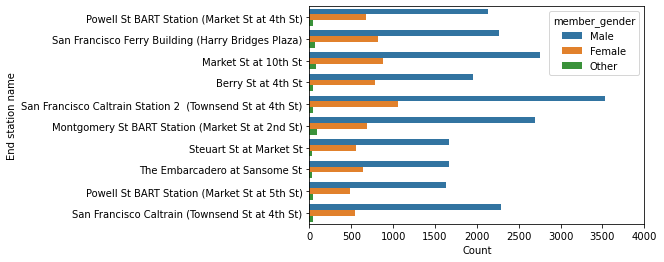

In [39]:
sns.countplot(data=bike_10_end_station, y = 'end_station_name', hue = 'member_gender')

plt.xlim(0,4000)
plt.xlabel('Count')
plt.ylabel('End station name');

The start and end locations have no preferred ones for gender

#### What is the relation between location and user type?

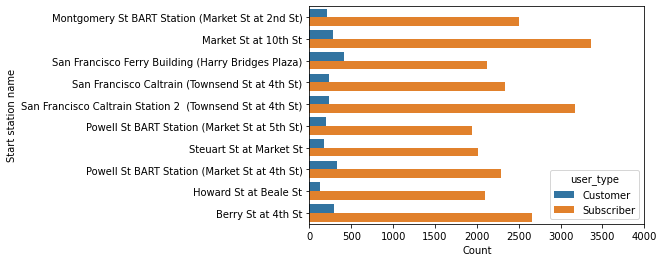

In [42]:
sns.countplot(data=bike_10_start_station, y = 'start_station_name', hue = 'user_type')

plt.xlim(0,4000)
plt.xlabel('Count')
plt.ylabel('Start station name');

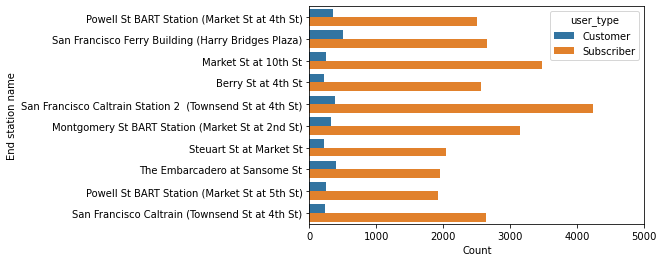

In [44]:
sns.countplot(data=bike_10_end_station, y = 'end_station_name', hue = 'user_type')

plt.xlim(0,5000)
plt.xlabel('Count')
plt.ylabel('End station name');

The start and end locations have no preferred ones for user types.

## Multivariate Exploration

Now, we will explore the relationship between more than two variables.

#### What is the relation between type, age and member of user?

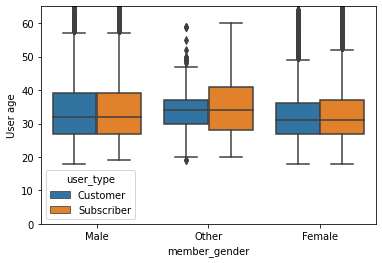

In [94]:
sns.boxplot(data=bike, x='member_gender', y='member_age', hue='user_type')

plt.ylim(0,65)
plt.ylabel('User age');

We can see that for the male and female gender, the age group of the user type is a approximately the same. For the other one, the age group of the subscribers is higher.

#### What is the relation between duration of trip, age and type of user?

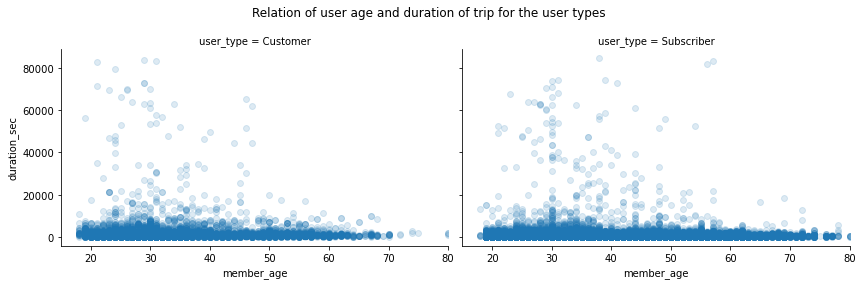

In [166]:
g = sns.FacetGrid(data=bike, col = 'user_type', height = 4, aspect = 1.5)
g.map(plt.scatter, 'member_age', 'duration_sec', alpha=0.15)

fig=plt.figure
plt.suptitle('Relation of user age and duration of trip for the user types')
g.tight_layout()
plt.xlim(15,80);

The duration of trip for user type is pratically the same for all ages, except between 70 and 80 years old, which subscribers do more than customers for this age group.

### Export final version of the dataset 

This version will be the one used in the slide part.

In [144]:
bike.to_csv('201902-fordgobike-tripdata_finalversion.csv', index=False)